<a href="https://colab.research.google.com/github/littlefox5678901234/ai-session/blob/main/AI_Lab_Internal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code uses the A* algorithm to find the shortest path between a start point and a goal point on a 2D grid with obstacles. Here are the steps in the code:

1) Import the PriorityQueue class from the queue module.

2) Define the heuristic function that estimates the distance from a given point to the goal point.

3) Define the astar function that takes in the start point, goal point, and the obstacles on the grid as parameters.

4) Initialize a set called visited to keep track of the points that have already been explored and a priority queue called frontier to keep track of the points to explore.

5) Add the start point to the frontier with its f-value (the sum of the g-value and the heuristic value), an empty path, and a g-value of 0.
While the frontier is not empty:

a. Get the point with the lowest f-value from the frontier.

b. If this point is the goal point, return the path to reach it.

c. If the point is an obstacle or has already been visited, skip it and continue with the next point.

d. Mark the point as visited.

e. Add the neighboring points to the frontier with updated path and g-values.

6) Return None if no path is found.

In [ ]:
#Implement the A* Algorithm to find the shortest path between 2 points on a 2D grid with obstacles

from queue import PriorityQueue
def heuristic(point, goal):
  return abs(point[0] - goal[0]) + abs(point[1] - goal[1])
def astar(start, goal, obstacles):
    """
    Returns the shortest path between start and goal on a 2D grid with obstacles using the A* algorithm.
    """
    # Define a heuristic function that estimates the distance from any point to the goal
    

    # Initialize the set of visited points and the priority queue of points to explore
    visited = set()
    frontier = PriorityQueue()
    frontier.put((heuristic(start, goal), start, [], 0))

    # Explore the frontier until the goal is reached or no more points can be explored
    while not frontier.empty():
        # Get the next point to explore
        f_value, current, path, g_value = frontier.get()

        # Check if the goal has been reached
        if current == goal:
            return path + [current]

        # Check if the current point is an obstacle or has already been visited
        if current in visited or current in obstacles:
            continue

        # Mark the current point as visited
        visited.add(current)

        # Add the neighbors of the current point to the frontier
        for dx, dy in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
            neighbor = (current[0] + dx, current[1] + dy)
            new_g_value = g_value + 1
            if neighbor not in visited:
                frontier.put((new_g_value + heuristic(neighbor, goal), neighbor, path + [current], new_g_value))

    # Return None if no path is found
    return None
# Define the start and goal points and the set of obstacles
start = (0, 0)
goal = (4, 4)
obstacles = [(1, 2), (2, 2), (3, 2), (3, 3)]

# Find the shortest path using the A* algorithm
path = astar(start, goal, obstacles)

# Print the path
if path is None:
    print("No path found.")
else:
    print("Shortest path:", path)

Shortest path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


In [ ]:
#Dijkstra's Algorithm to find the shortest path between 2 points on a 2D grid with obstacles
from heapq import heappop, heappush

def dijkstra(start, goal, obstacles, m, n):
    grid = [(i, j) for i in range(m) for j in range(n)]
    start_index = grid.index(start)
    goal_indices = goal
    
    heap = [(0, start_index, [])]
    visited = set()
    distances = {start_index: 0}
    
    while heap:
        (d, curr, path) = heappop(heap)
        if curr in visited:
            continue
        visited.add(curr)
        if (curr//m, curr%n) == goal:
            return distances[curr], path + [(curr//m, curr%n)]
        for neighbor in get_neighbors(curr, grid, obstacles, m, n):
            if neighbor in visited:
                continue
            new_distance = distances[curr] + 1  # assuming all edges have weight 1
            if neighbor not in distances.keys() or new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                heappush(heap, (new_distance, neighbor, path + [(curr//m, curr%n)]))
    return None, None

def get_neighbors(curr, grid, obstacles, m, n):
    neighbors = []
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
        x, y = grid[curr][0] + dx, grid[curr][1] + dy
        if x < 0 or x >= m or y < 0 or y >= n:
            continue
        if (x, y) in obstacles:
            continue
        neighbors.append(grid.index((x, y)))
    return neighbors

# Define the start node, goal nodes, and obstacles
start = (0, 0)
goals = (3, 3)
obstacles = []
m = 4
n = 4

# Run Dijkstra's algorithm
dist, path = dijkstra(start, goals, obstacles, m, n)

# Print the result
if dist is not None:
    print(f"The shortest path from {start} to {goals} is {dist} steps. The path is {path}")
else:
    print("There is no path from the start node to any of the goal nodes.")


The shortest path from (0, 0) to (3, 3) is 6 steps. The path is [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]


In [ ]:
#Recording times taken to run A* on the 2D grid while uniformly varying grid size
import time
times=[]
for i in range(60):
  start = time.time()
  astar((0,0), (i,i), [])
  end = time.time()
  times.append(end-start)
print(times)

[7.104873657226562e-05, 9.560585021972656e-05, 0.00018548965454101562, 0.00032019615173339844, 0.0005145072937011719, 0.0007455348968505859, 0.000993490219116211, 0.002356290817260742, 0.0016820430755615234, 0.0020651817321777344, 0.006617546081542969, 0.0030014514923095703, 0.0035026073455810547, 0.008675336837768555, 0.004861116409301758, 0.005401134490966797, 0.0062634944915771484, 0.006893157958984375, 0.008358955383300781, 0.008827924728393555, 0.010068893432617188, 0.011027812957763672, 0.011646747589111328, 0.012610197067260742, 0.013443946838378906, 0.016542434692382812, 0.01647472381591797, 0.017716169357299805, 0.01840829849243164, 0.020115375518798828, 0.020951032638549805, 0.025582075119018555, 0.024633407592773438, 0.026372909545898438, 0.026763916015625, 0.028803110122680664, 0.030308246612548828, 0.0319976806640625, 0.03377032279968262, 0.03607988357543945, 0.03740119934082031, 0.04382491111755371, 0.04089665412902832, 0.04291820526123047, 0.04574084281921387, 0.04925012

In [ ]:
#Recording times taken to run Dijkstra's Algorithm on the 2D grid while uniformly varying grid size
import time
times1=[]
for i in range(60):
  start = time.time()
  dijkstra((0,0), (i,i), [],i+1,i+1)
  end = time.time()
  times1.append(end-start)
print(times1)

[1.811981201171875e-05, 3.218650817871094e-05, 6.628036499023438e-05, 0.00010704994201660156, 0.00018072128295898438, 0.0009953975677490234, 0.0003769397735595703, 0.0005831718444824219, 0.0009672641754150391, 0.024907588958740234, 0.0018062591552734375, 0.006893157958984375, 0.005394458770751953, 0.012332916259765625, 0.008365392684936523, 0.0061798095703125, 0.00972604751586914, 0.01140451431274414, 0.012651205062866211, 0.016077756881713867, 0.018657922744750977, 0.01715850830078125, 0.019794464111328125, 0.015165090560913086, 0.017676830291748047, 0.021033287048339844, 0.024349451065063477, 0.02770829200744629, 0.03122687339782715, 0.03521609306335449, 0.04042553901672363, 0.04510307312011719, 0.05338764190673828, 0.0573122501373291, 0.07101845741271973, 0.0719442367553711, 0.08297610282897949, 0.09609150886535645, 0.10378789901733398, 0.11063075065612793, 0.1382460594177246, 0.13142609596252441, 0.14563345909118652, 0.15976858139038086, 0.27063560485839844, 0.22902631759643555, 0.

Text(0.5, 1.0, "Perfomance of A* vs Dijsltra's Algorithm for searching in a 2D grid with obstacles.")

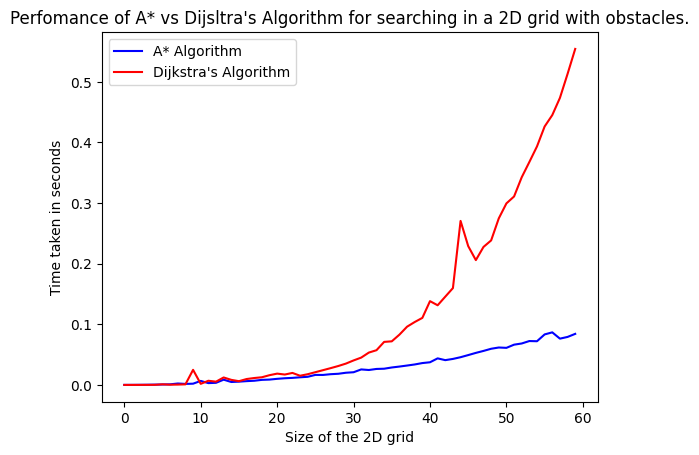

In [ ]:
#Plotting and comparing the times taken by A* Algorithm and Dijkstra's Algorithm for uniformly varying grid sizes
import matplotlib.pyplot as plt
plt.plot(list(range(60)), times, color = "blue", label = "A* Algorithm")
plt.plot(list(range(60)), times1, color = "red", label = "Dijkstra's Algorithm")
plt.legend()
plt.xlabel("Size of the 2D grid")
plt.ylabel("Time taken in seconds")
plt.title("Perfomance of A* vs Dijsltra's Algorithm for searching in a 2D grid with obstacles.")

In [ ]:
#Extending the A* Algorithm to a 3D version of the grid with obstacles
from queue import PriorityQueue

def astar3D(start, goal, obstacles):
    """
    Returns the shortest path between start and goal on a 2D grid with obstacles using the A* algorithm.
    """
    # Define a heuristic function that estimates the distance from any point to the goal
    def heuristic(point):
        return abs(point[0] - goal[0]) + abs(point[1] - goal[1]) + abs(point[2] - goal[2])

    # Initialize the set of visited points and the priority queue of points to explore
    visited = set()
    frontier = PriorityQueue()
    frontier.put((heuristic(start), start, [], 0))

    # Explore the frontier until the goal is reached or no more points can be explored
    while not frontier.empty():
        # Get the next point to explore
        f_value, current, path, g_value = frontier.get()

        # Check if the goal has been reached
        if current == goal:
            return path + [current]

        # Check if the current point is an obstacle or has already been visited
        if current in visited or current in obstacles:
            continue

        # Mark the current point as visited
        visited.add(current)

        # Add the neighbors of the current point to the frontier
        for dx, dy, dz in [(0, 0, -1), (0, 0, 1), (0, -1, 0), (0, 1, 0),(1, 0, 0), (-1, 0, 0)]:
            neighbor = (current[0] + dx, current[1] + dy, current[2] + dz)
            new_g_value = g_value + 1
            if neighbor not in visited:
                frontier.put((new_g_value + heuristic(neighbor), neighbor, path + [current], new_g_value))

    # Return None if no path is found
    return None
# Define the start and goal points and the set of obstacles
start = (0, 0, 0)
goal = (4, 4, 4)
obstacles = [(1, 2, 1), (2, 2, 2), (3, 2, 3), (3, 3, 1)]

# Find the shortest path using the A* algorithm
path = astar3D(start, goal, obstacles)

# Print the path
if path is None:
    print("No path found.")
else:
    print("Shortest path:", path)
    print("length of shortest path", len(path))


Shortest path: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 1, 4), (0, 2, 4), (0, 3, 4), (0, 4, 4), (1, 4, 4), (2, 4, 4), (3, 4, 4), (4, 4, 4)]
length of shortest path 13


In [ ]:
# A* for 2D grid with multiple goals
from queue import PriorityQueue

def heuristic(point, goals):
  heuristic = abs(point[0] - goals[0][0]) + abs(point[1] - goals[0][1])
  for i in goals:
      heuristic = min(heuristic, abs(point[0] - i[0]) + abs(point[1] - i[1]))
  return heuristic    
def astar(start, goals, obstacles):
    """
    Returns the shortest path between start and goal on a 2D grid with obstacles using the A* algorithm.
    """
    # Define a heuristic function that estimates the distance from any point to the goal

    # Initialize the set of visited points and the priority queue of points to explore
    visited = set()
    frontier = PriorityQueue()
    frontier.put((heuristic(start, goals), start, [], 0))

    # Explore the frontier until the goal is reached or no more points can be explored
    while not frontier.empty():
        # Get the next point to explore
        g_value, current, path, f_value = frontier.get()

        # Check if the goal has been reached
        if current in goals:
            return path + [current]

        # Check if the current point is an obstacle or has already been visited
        if current in visited or current in obstacles:
            continue

        # Mark the current point as visited
        visited.add(current)

        # Add the neighbors of the current point to the frontier
        for dx, dy in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
            neighbor = (current[0] + dx, current[1] + dy)
            new_g_value = g_value + 1
            if neighbor not in visited:
                frontier.put((new_g_value + heuristic(neighbor, goals), neighbor, path + [current], new_g_value))

    # Return None if no path is found
    return None
# Define the start and goal points and the set of obstacles
start = (0, 0)
goals = [(4, 4), (2,3), (1,3)]
obstacles = [(1, 2), (2, 2), (3, 2), (3, 3)]

# Find the shortest path using the A* algorithm
path = astar(start, goals, obstacles)

# Print the path
if path is None:
    print("No path found.")
else:
    print("Shortest path:", path)

Shortest path: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3)]


In [ ]:
# A* for 8 puzzles problem
from heapq import heappop, heappush

def solve(initial_state, goal_state):
    heap = [(heuristic(initial_state), initial_state, [initial_state], 0)]
    visited = set()    
    while heap:
        f_value, current, path, g_value = heappop(heap)
        if current == goal_state:
            return g_value, current, path
        if tuple(map(tuple,current)) in visited:
          continue
        visited.add(tuple(map(tuple,current)))
        for neighbor in neighbors(current):
            heappush(heap, (g_value + 1 + heuristic(neighbor), neighbor, path + [neighbor], g_value + 1))
    return None, None, None  # no solution found

def neighbors(state):
    neighbors = []
    row, col = next((i, j) for i, row in enumerate(state) for j, val in enumerate(row) if val == 0)
    for d_row, d_col in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
        new_row, new_col = row + d_row, col + d_col
        if 0 <= new_row < 3 and 0 <= new_col < 3:
            new_state = [row[:] for row in state]
            new_state[row][col], new_state[new_row][new_col] = new_state[new_row][new_col], new_state[row][col]
            neighbors.append(new_state)
    return neighbors

def heuristic(state):
    distance = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != 0:
                x, y = divmod(state[i][j]-1, 3)
                distance += abs(x-i) + abs(y-j)
    return distance

def path_to_moves(path):
    moves = []
    for i in range(len(path) - 1):
        current, next = path[i], path[i+1]
        for row in range(3):
            for col in range(3):
                if current[row][col] == 0:
                    row1, col1 = row, col
                if next[row][col] == 0:
                    row2, col2 = row, col
        if row1 > row2:
            moves.append('up')
        elif row1 < row2:
            moves.append('down')
        elif col1 > col2:
            moves.append('left')
        elif col1 < col2:
            moves.append('right')
    return moves

goal_state = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]
initial_state = [[6, 4, 7], [8, 5, 0], [3, 2, 1]]
length, state, path = solve(initial_state, goal_state)
if path is not None:
  print("The number of steps required to reach goal state is: ", len(path)-1)
  print("The required sequence of steps to reach goal state is: ", *path_to_moves(path))

  print("The sequence of puzzle states at each step is: ")
  for i in path:
    for j in range(3):
      for k in range(3):
        print(i[j][k], end = " ")
      print()
    print()
else:
  print("The goal state cannot be reached from this configuration.")

The number of steps required to reach goal state is:  31
The required sequence of steps to reach goal state is:  down left left up right up left down right right up left down down left up up right down right down left up right up left down left down right right
The sequence of puzzle states at each step is: 
6 4 7 
8 5 0 
3 2 1 

6 4 7 
8 5 1 
3 2 0 

6 4 7 
8 5 1 
3 0 2 

6 4 7 
8 5 1 
0 3 2 

6 4 7 
0 5 1 
8 3 2 

6 4 7 
5 0 1 
8 3 2 

6 0 7 
5 4 1 
8 3 2 

0 6 7 
5 4 1 
8 3 2 

5 6 7 
0 4 1 
8 3 2 

5 6 7 
4 0 1 
8 3 2 

5 6 7 
4 1 0 
8 3 2 

5 6 0 
4 1 7 
8 3 2 

5 0 6 
4 1 7 
8 3 2 

5 1 6 
4 0 7 
8 3 2 

5 1 6 
4 3 7 
8 0 2 

5 1 6 
4 3 7 
0 8 2 

5 1 6 
0 3 7 
4 8 2 

0 1 6 
5 3 7 
4 8 2 

1 0 6 
5 3 7 
4 8 2 

1 3 6 
5 0 7 
4 8 2 

1 3 6 
5 7 0 
4 8 2 

1 3 6 
5 7 2 
4 8 0 

1 3 6 
5 7 2 
4 0 8 

1 3 6 
5 0 2 
4 7 8 

1 3 6 
5 2 0 
4 7 8 

1 3 0 
5 2 6 
4 7 8 

1 0 3 
5 2 6 
4 7 8 

1 2 3 
5 0 6 
4 7 8 

1 2 3 
0 5 6 
4 7 8 

1 2 3 
4 5 6 
0 7 8 

1 2 3 
4 5 6 
7 0 8 

1 2 3 
4